In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.rcParams['figure.figsize'] = [9,9]

# Bayes

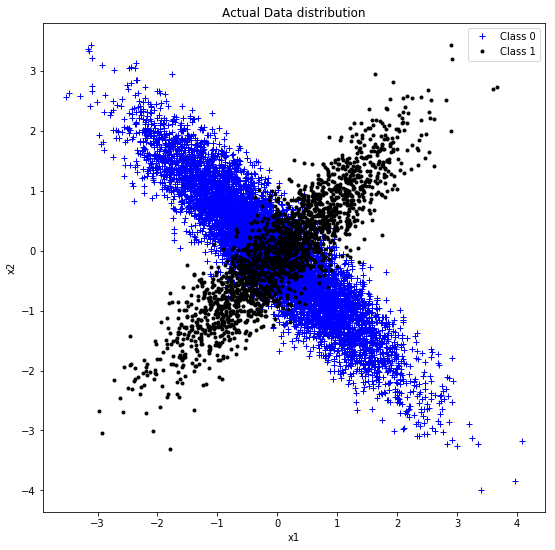

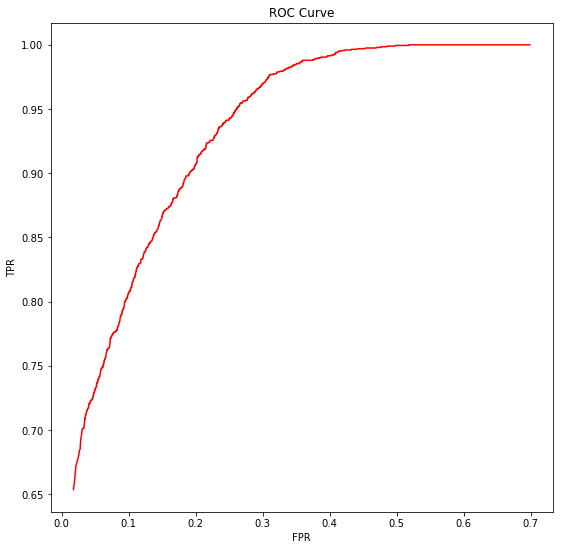

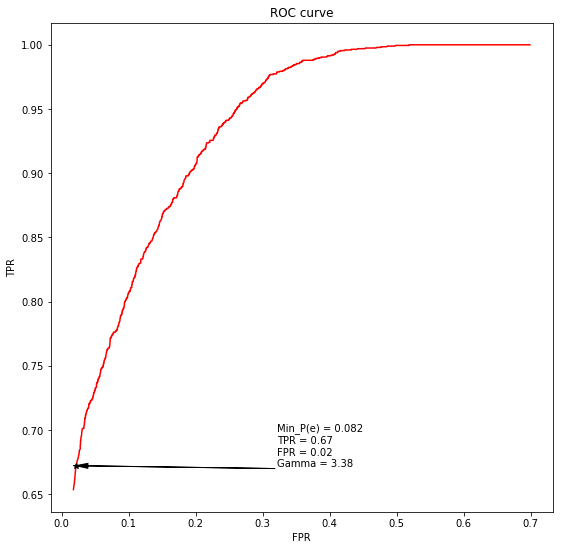

In [2]:
# number of features for n-D real values vector
features = 2 

# number of samples to be generated for the vector
samples = 10000

# Initialize the means for different distributions
mean = np.zeros((features,features))
mean[:,0] = [-0.1,0] # mean vector of class 0
mean[:,1] = [0.1, 0] # mean vector of class 1

# Initialize the covariance matrices
cov = np.zeros((features,features,features))
cov[:,:,0] = [[1,-0.9], [-0.9, 1]]  # Covariance matrix of class 0
cov[:,:,1] = [[1,0.9], [0.9, 1]]  # Covariance matrix of class 1

#priors of class 0 and 1 respectively.
prior = [0.8, 0.2]

# Generation of 10,000 samples of 2D data 
label = np.zeros((features,samples))
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
X = np.zeros((features,samples))
for index in range(samples):
    if(label[0,index] == 0):
        X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
    else:
        X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)


class0_count = float(list(label[0,:]).count(0)) # number of samples for class 0
class1_count = float(list(label[0,:]).count(1)) # number of samples for class 1
fpr =[] # false positive rate array
tpr = [] # true positive rate array
minPerror = [] # false positive rate array
gamma_list = [] 

# Creare list of threhold values for plotting ROC curve
q = list(sorted(X[0,:]))
gamma_list = []
for i in range(0,9999):
    gamma_list.append((q[i] + q[i+1])/2.0)
gamma_list = [gamma_list[i] for i in range(0,len(gamma_list)) if gamma_list[i]>=0]


# Calculate the discriminant score
logValpdf1 = np.log(multivariate_normal.pdf(X.T,mean=mean[:,1], cov = cov[:,:,1]))
logValpdf0 = np.log(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = cov[:,:,0]))
discriminant_score = logValpdf1 - logValpdf0

# Calculate probability of minimum error for all values in gamma_list
for gamma in gamma_list:
    label[1,:] = (discriminant_score >= np.log(gamma)).astype(int)
    x00 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 0)] 
    x01 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 1)]
    x10 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 0)]
    x11 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 1)]
    fpr.append(len(x10)/class0_count)
    tpr.append(len(x11)/class1_count)
    minPerror.append(1 - ((len(x00)+len(x11))/10000.0))
    
# Plot the actual data distribution
x0 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x1 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]
plt.plot(X[0,x0],X[1,x0],'+',color ='blue')
plt.plot(X[0,x1],X[1,x1],'.',color = 'black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Actual Data distribution")
plt.legend(['Class 0','Class 1'])
plt.show()


# Plot the ROC curve    
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

# Plot ROC curve with Mininum error point
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = 'black')
plt.title("ROC curve")
plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
            +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n' 
            +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n' 
            +'Gamma = '+ str(round(gamma_list[np.argmin(minPerror)],2)),xy =(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
             xytext=(fpr[np.argmin(minPerror)]+0.3,tpr[np.argmin(minPerror)]),
             arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shrink=0))
plt.show()

# Naive Bayes

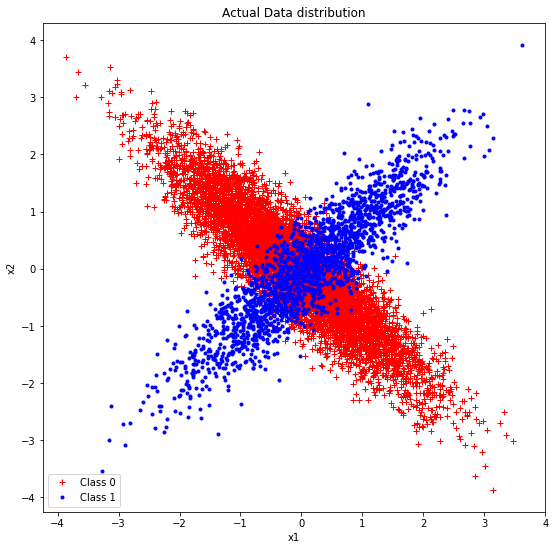

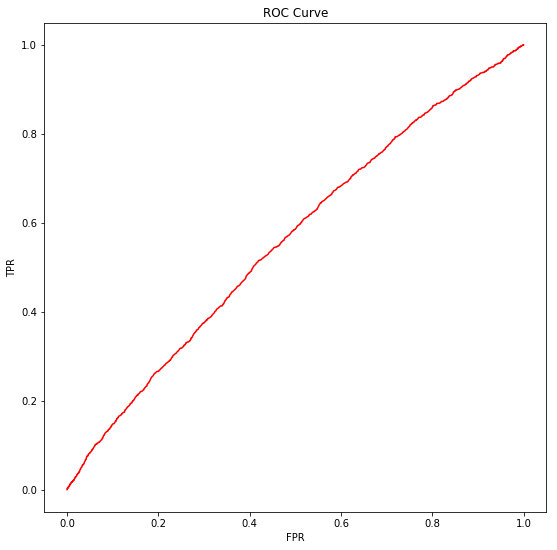

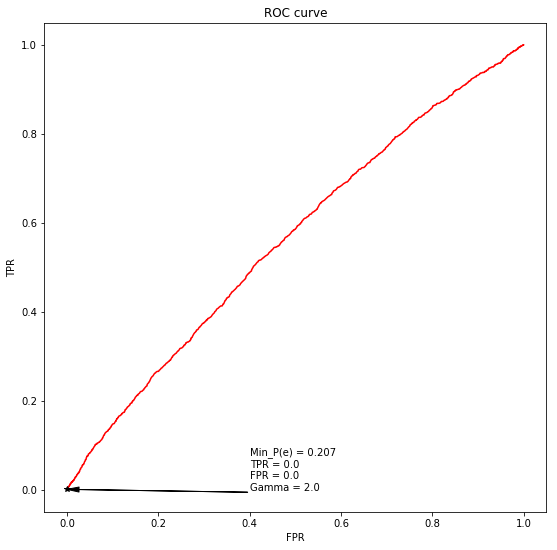

In [3]:
# number of features for n-D real values vector
features = 2 

# number of samples to be generated for the vector
samples = 10000

# Initialize the means for different distributions
mean = np.zeros((features,features))
mean[:,0] = [-0.1,0] # mean vector of class 0
mean[:,1] = [0.1, 0] # mean vector of class 1

# Initialize the covariance matrices
cov = np.zeros((features,features,features))
cov[:,:,0] = [[1,-0.9], [-0.9, 1]]  # Covariance matrix of class 0
cov[:,:,1] = [[1,0.9], [0.9, 1]]  # Covariance matrix of class 1

#priors of class 0 and 1 respectively.
prior = [0.8, 0.2]

# Generation of 10,000 samples of 2D data 
label = np.zeros((features,samples))
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
X = np.zeros((features,samples))
for index in range(samples):
    if(label[0,index] == 0):
        X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
    else:
        X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)


class0_count = float(list(label[0,:]).count(0)) # number of samples for class 0
class1_count = float(list(label[0,:]).count(1)) # number of samples for class 1
fpr =[] # false positive rate array
tpr = [] # true positive rate array
minPerror = [] # false positive rate array
gamma_list = [] 

# Creare list of threhold values for plotting ROC curve
q = list(sorted(X[0,:]))
gamma_list = []
for i in range(0,9999):
    gamma_list.append((q[i] + q[i+1])/2.0)
gamma_list = [gamma_list[i] for i in range(0,len(gamma_list)) if gamma_list[i]>=0]


# Calculate the discriminant score
logValpdf1 = np.log(multivariate_normal.pdf(X.T,mean=mean[:,1], cov = np.identity(2)))
logValpdf0 = np.log(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = np.identity(2)))
discriminant_score = logValpdf1 - logValpdf0

# Calculate probability of minimum error for all values in gamma_list
for gamma in gamma_list:
    label[1,:] = (discriminant_score >= np.log(gamma)).astype(int)
    x00 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 0)] 
    x01 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 1)]
    x10 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 0)]
    x11 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 1)]
    fpr.append(len(x10)/class0_count)
    tpr.append(len(x11)/class1_count)
    minPerror.append(1 - ((len(x00)+len(x11))/10000.0))
    
# Plot the actual data distribution
x0 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x1 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]
plt.plot(X[0,x0],X[1,x0],'+',color ='red')
plt.plot(X[0,x1],X[1,x1],'.',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Actual Data distribution")
plt.legend(['Class 0','Class 1'])
plt.show()

# Plot the ROC curve    
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()



# Plot the ROC curve    
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = 'black')
plt.title("ROC curve")
plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
            +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n' 
            +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n' 
            +'Gamma = '+ str(round(gamma_list[np.argmin(minPerror)],2)),xy =(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
             xytext=(fpr[np.argmin(minPerror)]+0.4,tpr[np.argmin(minPerror)]),
             arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shrink=0))
plt.show()

# Fisher LDA

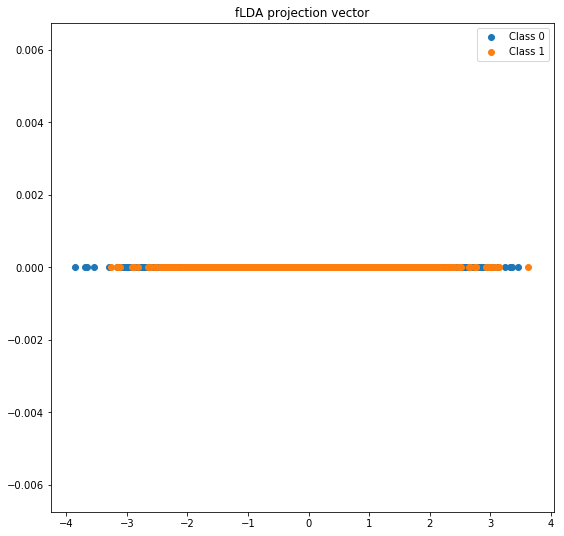

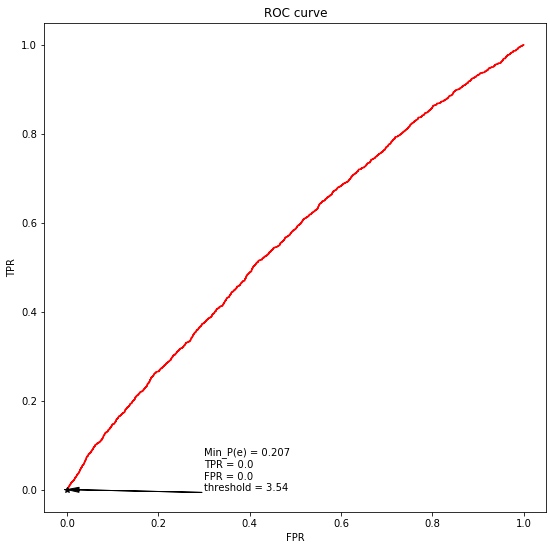

In [4]:
# Calculate the Sb Matrix
Sb = np.dot((mean[:,0] - mean[:,1]), (mean[:,0] - mean[:,1]).T)

# Calculate the Sw Matrix
Sw = (cov[:,:,0] +cov[:,:,1])

# Calculation of W_lda
a,b =np.linalg.eig(np.dot(np.linalg.inv(Sw),Sb))
np.dot(np.linalg.inv(Sw),Sb)
w = np.array(b[np.argmax(a)])

# x0 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
# x1 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]

# Calculation of Projection vector
y0 = np.zeros((2,len(x0)))
y1 = np.zeros((2,len(x1)))
y0[0,:] = np.dot(w.T, X[:,x0])
y1[0,:] = np.dot(w.T, X[:,x1])
y = np.sort(np.hstack((y0[0],y1[0])))

# Calculate Threshold values
a = []
for i in range(len(y)-1):
    a.append((y[i] + y[i+1])/2.0)

# Calculate decisions for varying thresholds
fpr = []
tpr = []
minPerror = []

for threshold in a:
    x00 = list((y0[0,:] >= threshold).astype(int)).count(0)
    x01 = list((y1[0,:] >= threshold).astype(int)).count(0)
    x10 = list((y0[0,:] >= threshold).astype(int)).count(1)
    x11 = list((y1[0,:] >= threshold).astype(int)).count(1)
    fpr.append(float(x10)/y0.shape[1])
    tpr.append(float(x11)/y1.shape[1])
    minPerror.append(1 - ((x00)+(x11))/10000.0)

# Plot the Projection vector
plt.scatter(y0[0,:],np.zeros((y0.shape[1])))
plt.scatter(y1[0,:],np.zeros((y1.shape[1])))
plt.legend(['Class 0','Class 1'])
plt.title('fLDA projection vector')
plt.show()

# Plot the ROC curve
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = 'black')
plt.title("ROC curve")
plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
            +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n' 
            +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n' 
            +'threshold = '+ str(round(a[np.argmin(minPerror)],2)),xy =(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
             xytext=(fpr[np.argmin(minPerror)]+0.3,tpr[np.argmin(minPerror)]),
             arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shrink=0))
plt.show()

# Gaussian Mixture Model

754


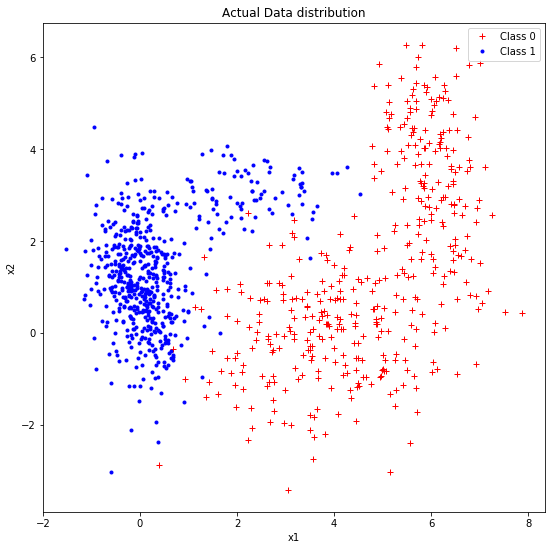

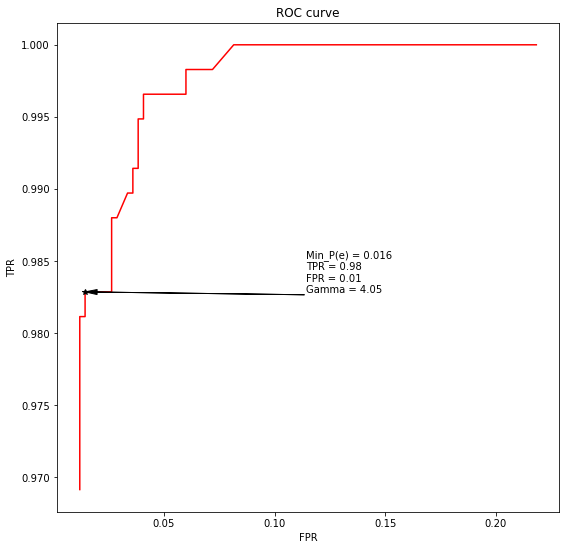

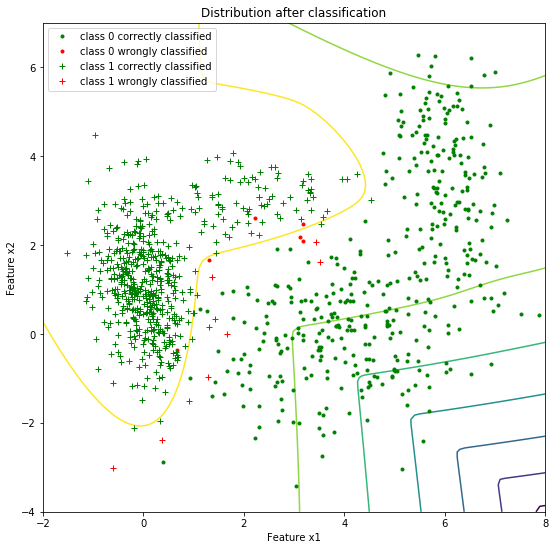

In [5]:
# seed to recreate the same results everytime
np.random.seed(1000)

features = 2 # number of features
samples = 1000 #number of samples to be generated

# Mean matrix for different distributions
mean = np.zeros((2,4)) 
mean[:,0] = [4,0] 
mean[:,1] = [6,4]
mean[:,2] = [0,1]
mean[:,3] = [2,3]

# Covariance matrix for the  different distributions
cov = np.zeros((2,2,4))
cov[:,:,0] = np.array([[5,1],[1,4]])/3.0  
cov[:,:,1] = np.array([[3,-2], [-2, 15]])/10.0
cov[:,:,2] = np.array([[3,-2], [-2, 15]])/13.0
cov[:,:,3] = np.array([[15,1],[1,3]])/13.0

# priors for two classes
prior = [0.4, 0.6]

# prior for different gaussions of distribution of class 0
prior_gmm0 = [0.3,0.7]
# prior for different gaussions of distribution of class 1
prior_gmm1 = [0.2,0.8]

# Cost/loss matrix 
loss = np.array([[0,1], [1,0]])

'''label matrix where first row corresponds to true labels and second row 
the labels corresponding to labels of decisions made'''
label = np.zeros((2,samples))

# Randomly generate labels
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int)
X = np.zeros((features,samples))

# Generate the data
for index in range(samples):
    if(label[0,index] == 0):
        if(np.random.uniform(0,1,1) >= prior_gmm0[0]):
            X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1)
        else:
            X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1)
    else:
        if(np.random.uniform(0,1,1) >= prior_gmm1[0]):
            X[:,index] = np.random.multivariate_normal(mean[:,2],cov[:,:,2],1)
        else:
            X[:,index] = np.random.multivariate_normal(mean[:,3],cov[:,:,3],1)



# Creare list of threhold values for plotting ROC curve
q = list(sorted(X[0,:]))
gamma_list = []
for i in range(0,999):
    gamma_list.append((q[i] + q[i+1])/2.0)
gamma_list = [gamma_list[i] for i in range(0,len(gamma_list)) if gamma_list[i]>=0]

# Calculate the discriminant score

logValpdf1 = np.log(prior_gmm1[0] *(multivariate_normal.pdf(X.T,mean=mean[:,2], cov = cov[:,:,2])) + prior_gmm1[1] * (multivariate_normal.pdf(X.T,mean=mean[:,3], cov = cov[:,:,3])))
logValpdf0 =  np.log(prior_gmm0[0]*(multivariate_normal.pdf(X.T,mean = mean[:,0],cov = cov[:,:,0])) + prior_gmm0[1] * (multivariate_normal.pdf(X.T,mean=mean[:,1], cov = cov[:,:,1])))
discriminant_score = logValpdf1 - logValpdf0



class0_count = float(list(label[0,:]).count(0)) # number of samples for class 0
class1_count = float(list(label[0,:]).count(1)) # number of samples for class 1
fpr =[] # false positive rate array
tpr = [] # true positive rate array
minPerror = [] # false positive rate array

# Calculate probability of minimum error for all values in gamma_list
for gamma in gamma_list:
    label[1,:] = (discriminant_score >= np.log(gamma)).astype(int)
    x00 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 0)] 
    x01 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 1)]
    x10 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 0)]
    x11 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 1)]
    fpr.append(len(x10)/class0_count)
    tpr.append(len(x11)/class1_count)
    minPerror.append(1 - ((len(x00)+len(x11))/1000.0))
print(len(minPerror))
    
# Plot the actual data distribution
x0 = [i for i in range(label.shape[1]) if (label[0,i] == 0)]
x1 = [i for i in range(label.shape[1]) if (label[0,i] == 1 )]
plt.plot(X[0,x0],X[1,x0],'+',color ='red')
plt.plot(X[0,x1],X[1,x1],'.',color = 'blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Actual Data distribution")
plt.legend(['Class 0','Class 1'])
plt.show()


# Plot the ROC curve    
plt.plot(fpr,tpr,color = 'red' )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color = 'black')
plt.title("ROC curve")
plt.annotate(s='Min_P(e) = ' + str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
            +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) + '\n' 
            +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) + '\n' 
            +'Gamma = '+ str(round(gamma_list[np.argmin(minPerror)],2)),xy =(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
             xytext=(fpr[np.argmin(minPerror)]+0.1,tpr[np.argmin(minPerror)]),
             arrowprops=dict(facecolor='black', width = 0.01,headwidth = 5,shrink=0))
plt.show()

# Code to plot the distribution after Classification
label[1,:] = (discriminant_score >= np.log(gamma_list[np.argmin(minPerror)])).astype(int)
x00 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 0)]
x01 = [i for i in range(label.shape[1]) if (label[0,i] == 0 and label[1,i] == 1)]
x10 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 0)]
x11 = [i for i in range(label.shape[1]) if (label[0,i] == 1 and label[1,i] == 1)]
plt.plot(X[0,x00],X[1,x00],'.',color ='g')
plt.plot(X[0,x01],X[1,x01],'.',color = 'r')
plt.plot(X[0,x11],X[1,x11],'+',color ='g')
plt.plot(X[0,x10],X[1,x10],'+',color = 'r')
plt.legend(["class 0 correctly classified",'class 0 wrongly classified','class 1 correctly classified','class 1 wrongly classified'])
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.title('Distribution after classification')
horizontalGrid = np.linspace(np.floor(min(X[0,:])),np.ceil(max(X[0,:])),101);
verticalGrid = np.linspace(np.floor(min(X[1,:])),np.ceil(max(X[1,:])),91);
dsg = np.zeros((91,101))
a = np.array(np.meshgrid(horizontalGrid,verticalGrid))
for i in range(91):
    for j in range(101):
        p = 0.5 *multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,2], cov = cov[:,:,2]) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,3], cov = cov[:,:,3])
        q = 0.5 *multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,0], cov = cov[:,:,0]) + 0.5*multivariate_normal.pdf(np.array([a[0][i][j], a[1][i][j]]),mean=mean[:,1], cov = cov[:,:,1])
        dsg[i][j] = np.log(p) - np.log(q) - np.log(gamma)

plt.contour(a[0],a[1],dsg)
plt.show()